In [1]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import utils

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(404, 13)
(404,)
(102, 13)
(102,)


In [4]:
print(train_data[1])
print(train_labels[1])

[2.1770e-02 8.2500e+01 2.0300e+00 0.0000e+00 4.1500e-01 7.6100e+00
 1.5700e+01 6.2700e+00 2.0000e+00 3.4800e+02 1.4700e+01 3.9538e+02
 3.1100e+00]
42.3


# Normalization of Data

<img src='https://www.spreadsheetweb.com/wp-content/uploads/2020/07/How-to-normalize-data-in-Excel-011.png'>

In [5]:
def normalize(data):
    mean = data.mean(axis = 0)
    std = data.std(axis = 0)
    result = (data - mean)/std
    return result

In [6]:
# for training data
train_data = normalize(train_data)
#for test data
test_data = normalize(test_data)

In [7]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

In [8]:
print(train_data.shape[1])

13


In [9]:
def train_model():
    network = models.Sequential()
    network.add(layers.Dense(64,activation='relu', input_shape=(train_data.shape[1],)))
    network.add(layers.Dense(64,activation='relu'))
    network.add(layers.Dense(1))
    network.compile(optimizer='rmsprop',loss='mse',metrics='mae')
    return network

In [11]:
k = 4
num_val_samples = len(train_data) // k
num_epochs = 500
all_mae_histories = []

# Loop over each fold
for i in range(k):
    print('Processing fold #', i)
    
    # Prepare validation data and targets
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples: (i + 1) * num_val_samples]
    
    # Prepare partial training data and targets by excluding the current fold
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i + 1) * num_val_samples:]],
        axis=0)
    
    # Train the model
    model = train_model()  # Replace with your own code to create and compile the model
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    
    # Retrieve validation mean absolute error (mae) history
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [15]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

In [16]:
history.history.values()

dict_values([[215.79653930664062, 29.82805824279785, 20.565336227416992, 17.386037826538086, 15.22230052947998, 13.1922607421875, 11.590405464172363, 12.28565788269043, 11.758495330810547, 10.969836235046387, 10.580253601074219, 10.26496410369873, 10.199853897094727, 9.573809623718262, 9.659101486206055, 9.412931442260742, 9.197517395019531, 8.952163696289062, 8.742377281188965, 8.524584770202637, 8.74351978302002, 8.595394134521484, 8.588759422302246, 7.877130508422852, 8.045167922973633, 8.024258613586426, 7.438864231109619, 7.785493850708008, 7.613036155700684, 7.245633602142334, 7.137886047363281, 7.273367404937744, 7.176393508911133, 6.6031293869018555, 6.88535213470459, 7.04972505569458, 7.0405354499816895, 6.996164798736572, 6.923098087310791, 6.620397567749023, 6.557919025421143, 6.601896286010742, 6.327882289886475, 6.421902656555176, 6.1339850425720215, 6.389298439025879, 6.030418395996094, 5.923133373260498, 5.7362380027771, 6.096272945404053, 5.952231407165527, 6.0590786933

In [17]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
average_mae_history

[4.5529667139053345,
 3.440075635910034,
 3.0527418851852417,
 2.796088397502899,
 2.7372979521751404,
 2.7186020016670227,
 2.754658341407776,
 2.6714707016944885,
 2.826250195503235,
 2.696380615234375,
 2.473240613937378,
 2.468467950820923,
 2.6008055210113525,
 2.4579455852508545,
 2.534127712249756,
 2.4022735357284546,
 2.4075369834899902,
 2.483074367046356,
 2.470708429813385,
 2.428281545639038,
 2.3991141617298126,
 2.412919282913208,
 2.391655385494232,
 2.3320706486701965,
 2.3636212944984436,
 2.2944386303424835,
 2.377700001001358,
 2.2924005687236786,
 2.423094093799591,
 2.409919023513794,
 2.377569079399109,
 2.5194138884544373,
 2.3728391528129578,
 2.340854227542877,
 2.388377845287323,
 2.2594106197357178,
 2.2990677654743195,
 2.4329934120178223,
 2.3454339802265167,
 2.2005316615104675,
 2.3665977716445923,
 2.408843517303467,
 2.295064687728882,
 2.2428009510040283,
 2.4607803225517273,
 2.3056640028953552,
 2.392660081386566,
 2.3266074657440186,
 2.32384920120

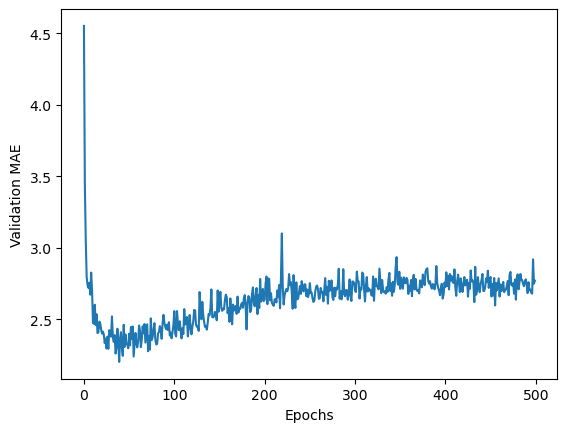

In [19]:
import matplotlib.pyplot as plt
plt.plot(average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

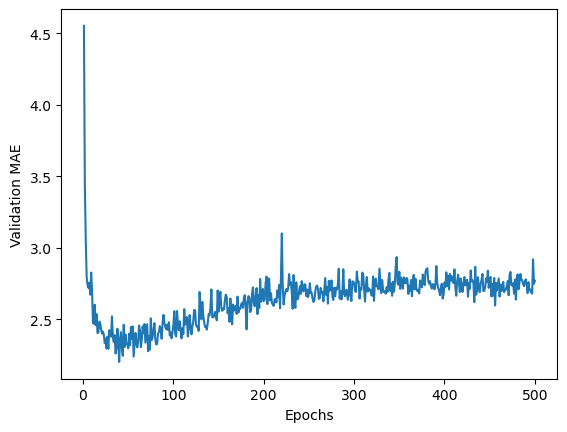

In [20]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

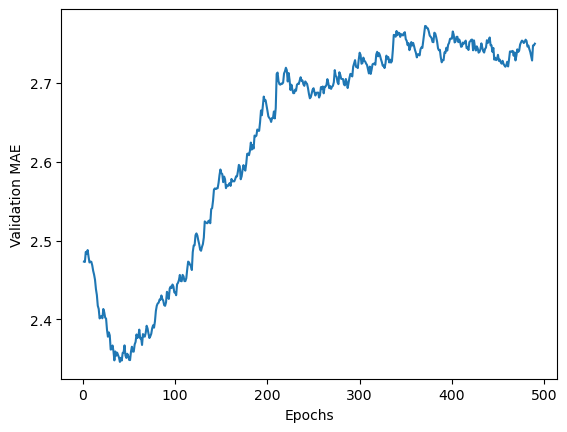

In [21]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points
    
smooth_mae_history = smooth_curve(average_mae_history[10:])
plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [23]:
model = train_model()
model.fit(train_data, train_labels,
          epochs=40, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 5ms/step - loss: 18.1813 - mae: 2.7517


In [24]:
model.predict(test_data)

4/4 [==============================] - 0s 5ms/step


array([[ 7.314661 ],
       [18.73308  ],
       [22.021444 ],
       [31.136312 ],
       [25.66915  ],
       [21.461866 ],
       [25.940863 ],
       [21.765823 ],
       [18.472666 ],
       [20.992441 ],
       [21.382341 ],
       [18.002924 ],
       [15.197184 ],
       [42.27846  ],
       [15.905016 ],
       [18.879402 ],
       [26.783318 ],
       [20.71651  ],
       [17.6034   ],
       [24.185493 ],
       [10.330294 ],
       [12.991775 ],
       [21.859512 ],
       [15.625322 ],
       [20.854141 ],
       [24.1256   ],
       [27.131609 ],
       [29.935007 ],
       [ 9.681487 ],
       [20.822304 ],
       [20.269228 ],
       [12.675236 ],
       [30.834177 ],
       [25.282078 ],
       [13.884688 ],
       [ 5.801472 ],
       [15.59772  ],
       [20.324888 ],
       [20.824339 ],
       [26.204493 ],
       [28.172728 ],
       [27.756645 ],
       [11.739863 ],
       [40.946228 ],
       [30.796923 ],
       [25.482159 ],
       [26.242762 ],
       [18.24